# Visual Question Answering (VQA) を用いた「AI にファッションを褒めてもらう」アプリケーションのサンプル

### テスト画像の準備

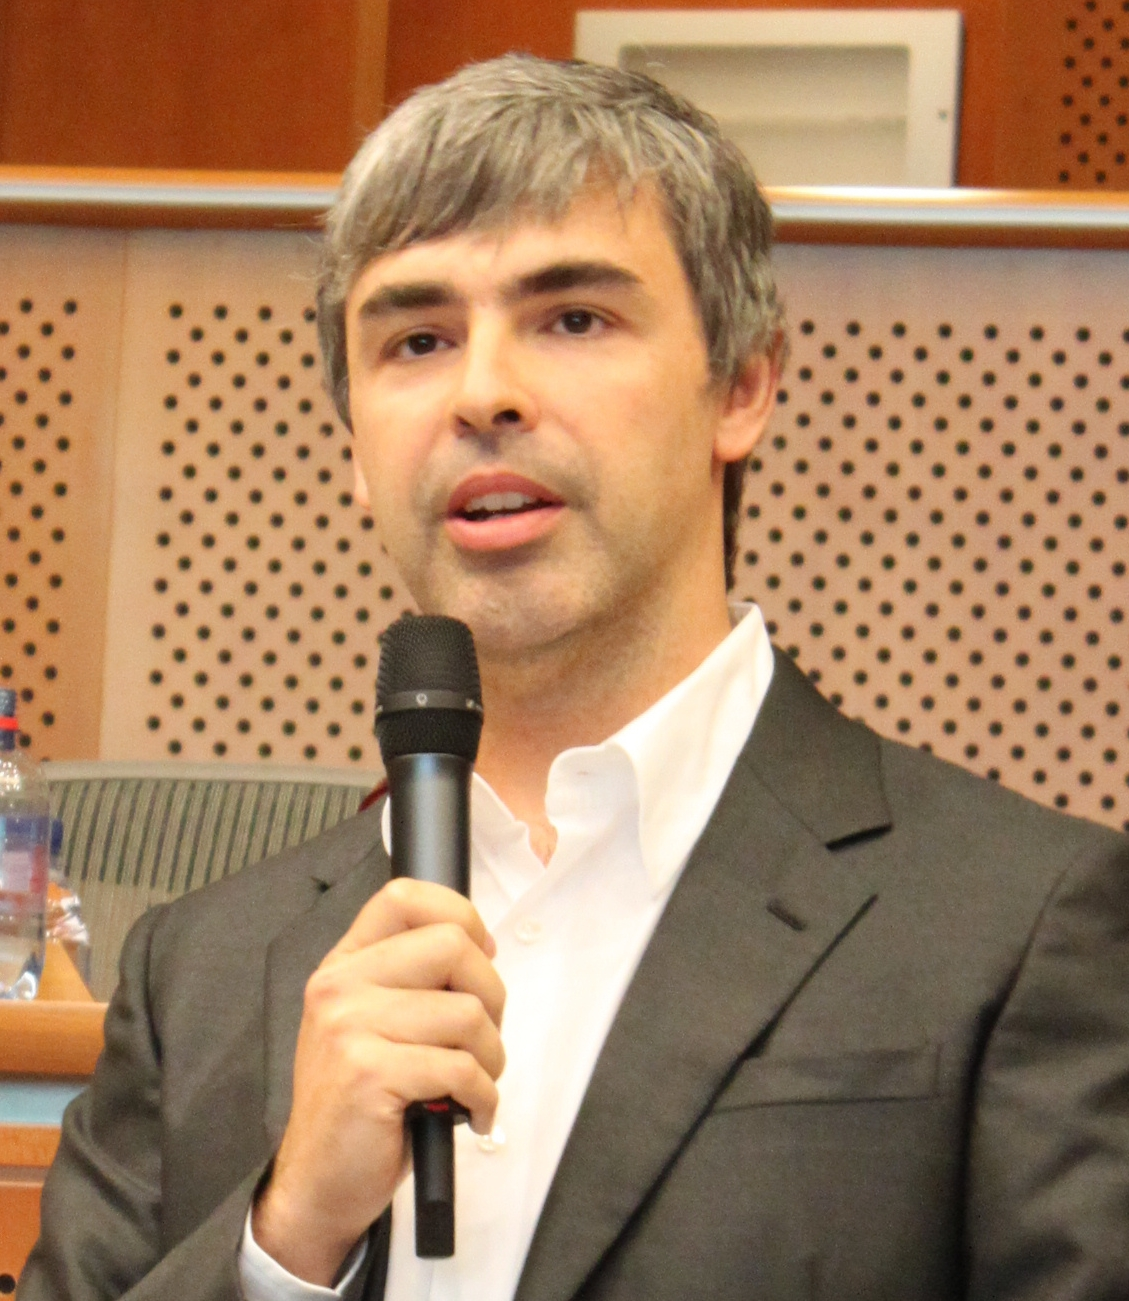

In [1]:
!wget -q -O image.jpg \
https://upload.wikimedia.org/wikipedia/commons/e/ec/Larry_Page_in_the_European_Parliament%2C_17.06.2009_%28cropped%29.jpg

from IPython.display import Image as display_image
display_image(filename='image.jpg', width=200)

This file is licensed under the Creative Commons Attribution-Share Alike 3.0 Unported license.

https://commons.wikimedia.org/wiki/File:Larry_Page_in_the_European_Parliament,_17.06.2009_(cropped).jpg

### Image captioning model を使って、画像の内容をテキストで記述

In [2]:
from vertexai.preview.vision_models import ImageCaptioningModel
image_captioning_model = ImageCaptioningModel.from_pretrained('imagetext@001')

def get_image_description(image):
    results = image_captioning_model.get_captions(
        image=image,
        number_of_results=3)
    results.sort(key=len)
    return results[-1]

In [3]:
from vertexai.preview.vision_models import Image
image = Image.load_from_file('image.jpg')

get_image_description(image)

'a man in a suit is holding a microphone in his hand'

### Image QA model を使って、画像内のファッションアイテムを取得

In [4]:
from vertexai.preview.vision_models import ImageQnAModel
image_qna_model = ImageQnAModel.from_pretrained('imagetext@001')

def get_fashion_items(image):
    results = image_qna_model.ask_question(
      image=image,
      question='details of the fashion items in this picture.',
      number_of_results=3)
    results.sort(key=len)
    return results[-1]

In [5]:
get_fashion_items(image)

'suit, white shirt'

### 得られた情報を使って、PaLM API で「ファッションを褒めるメッセージ」を生成

In [6]:
from vertexai.preview.language_models import TextGenerationModel
generation_model = TextGenerationModel.from_pretrained('text-bison@002')

def get_compliment_message(image_file):
    prompt = '''\
ファッションアドバイザーの立場で、以下の様に記述される人物を褒め称える文章を作ってください。
その人物に語りかける様に、数行の文章を作ってください。
個人を特定する名前は使用しないでください。

記述：{}

ファッションアイテム：{}
'''

    image = Image.load_from_file(image_file)
    description = get_image_description(image)
    items = get_fashion_items(image)
    answer = generation_model.predict(
        prompt.format(description, items),
        temperature=0.2, max_output_tokens=1024,
        top_k=40, top_p=0.8).text
    return answer 

In [7]:
get_compliment_message('image.jpg')

' あなたの着こなしは、まさに完璧です。スーツのシルエットがあなたの体を美しく際立たせ、白いシャツが清潔感と爽やかさを演出しています。そして、マイクを手にした姿は、まさにカリスマ性そのもの。あなたのファッションセンスは、まさに一流です。'

### その他の画像でテスト

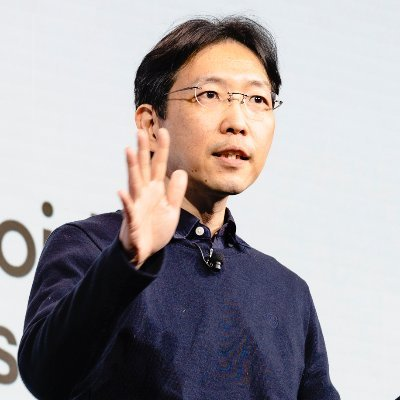

In [8]:
!wget -q -O image.jpg \
https://raw.githubusercontent.com/google-cloud-japan/sa-ml-workshop/main/blog/sns_profile_image.jpg

display_image(filename='image.jpg', width=200)

In [9]:
get_compliment_message('image.jpg')

' あなたのファッションセンスは素晴らしいです。眼鏡と青いセーターの組み合わせは、知的で落ち着いた印象を与えています。シャツとセーターのレイヤードスタイルも、とてもおしゃれです。あなたのファッションセンスは、きっと多くの人から称賛されることでしょう。'

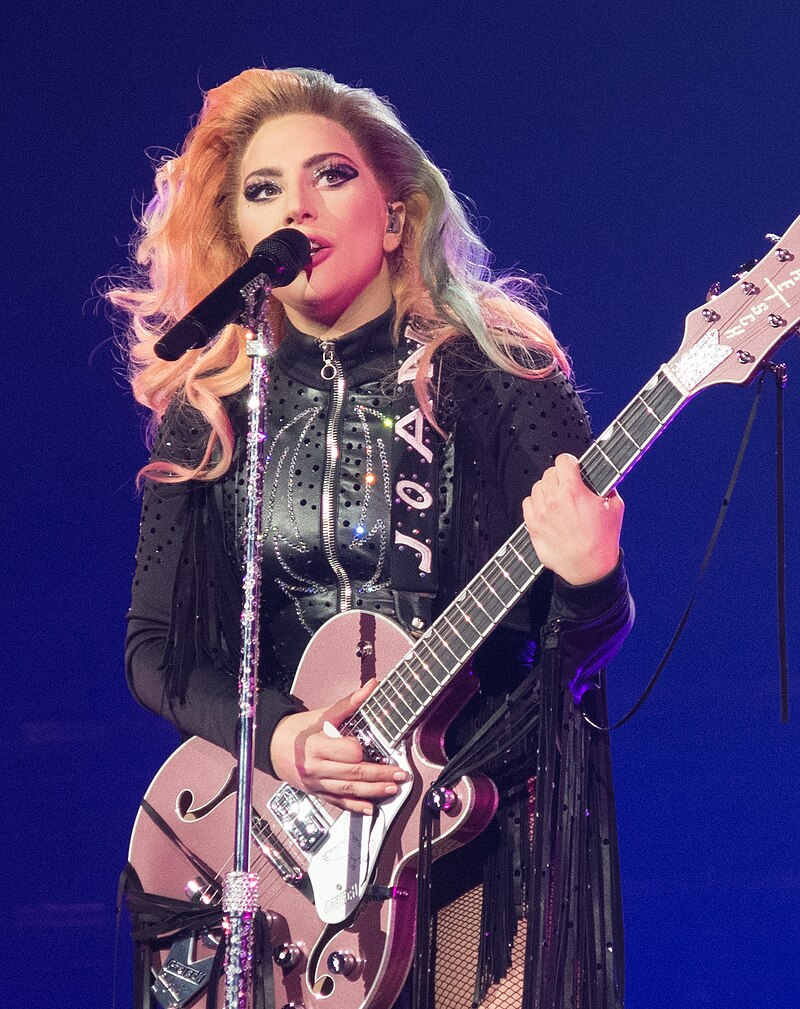

In [10]:
!wget -q -O image.jpg \
https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Lady_Gaga_JWT_Toronto%2C_2017-09-06_%28cropped2%29.jpg/800px-Lady_Gaga_JWT_Toronto%2C_2017-09-06_%28cropped2%29.jpg

display_image(filename='image.jpg', width=200)

This file is licensed under the Creative Commons Attribution-Share Alike 2.0 Generic license.

https://commons.wikimedia.org/wiki/File:Lady_Gaga_JWT_Toronto,_2017-09-06_(cropped2).jpg

In [11]:
get_compliment_message('image.jpg')

' あなたのファッションセンスは、まさに唯一無二です。ギターを片手に、マイクに向かって歌う姿は、まるでロックスターのよう。エピフォンのギターが、あなたのスタイルにさらなる輝きを加えています。'